<a href="https://colab.research.google.com/github/Uchiha-D-Kurosaki/Hello-World/blob/master/StockPredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense ,LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [54]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-12-30')
#show the tabular data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539
...,...,...,...,...,...,...
2020-12-23,132.429993,130.779999,132.160004,130.960007,88223700.0,130.764603
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053


In [55]:
#Get the number of rows and columns in dataset
df.shape

(1510, 6)

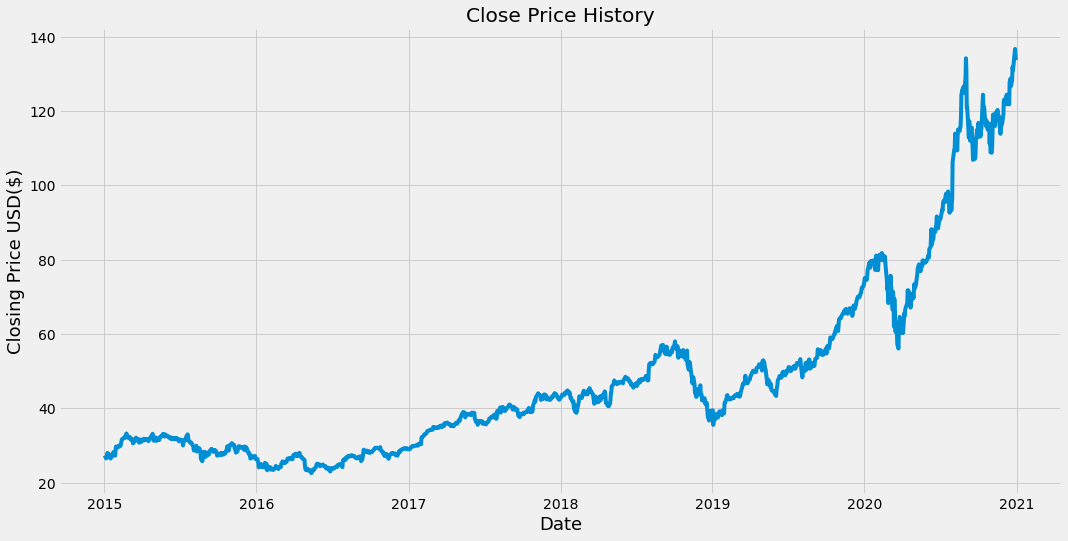

In [56]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD($)',fontsize=18)
plt.show()


In [57]:
#Create a new data frame with only close column
data = df.filter(['Close'])
#Convert the data frame to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1208

In [58]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.04160643],
       [0.03485825],
       [0.03488017],
       ...,
       [1.        ],
       [0.98404971],
       [0.97397133]])

In [59]:
#Create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.04160643, 0.03485825, 0.03488017, 0.0381447 , 0.04721529,
       0.04747821, 0.04143114, 0.04355638, 0.04263618, 0.0361071 ,
       0.0342886 , 0.04026994, 0.04208844, 0.04833269, 0.04960345,
       0.04986635, 0.04119014, 0.05470838, 0.06257395, 0.05876168,
       0.06198238, 0.06202621, 0.06401998, 0.06485256, 0.06263968,
       0.06437054, 0.06940975, 0.07567591, 0.07913764, 0.08049604,
       0.08213927, 0.08408922, 0.08349765, 0.08579817, 0.09346655,
       0.09164804, 0.08424257, 0.08781386, 0.08351959, 0.08489987,
       0.08549144, 0.08369483, 0.0790281 , 0.07944437, 0.0806275 ,
       0.07486527, 0.06989177, 0.0747338 , 0.07284957, 0.07582928,
       0.0804084 , 0.08354148, 0.08141625, 0.07791071, 0.08078086,
       0.07964157, 0.07238947, 0.0742737 , 0.07210465, 0.07894046])]
[0.0746899850233729]

[array([0.04160643, 0.03485825, 0.03488017, 0.0381447 , 0.04721529,
       0.04747821, 0.04143114, 0.04355638, 0.04263618, 0.0361071 ,
       0.0342886 , 0.04026994, 0.042

In [60]:
#convert the x_train and y_train datasets to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1148, 60, 1)

In [61]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [62]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



1148/1148 [==============================] - 33s 26ms/step - loss: 0.0016


In [65]:
#Create the testing data set
#Create a new array containing scaled values from index 1149 to 1800
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [66]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [67]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [68]:
#Get models's predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [69]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean( predictions - y_test )**2 )
rmse

7.197674163919411

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


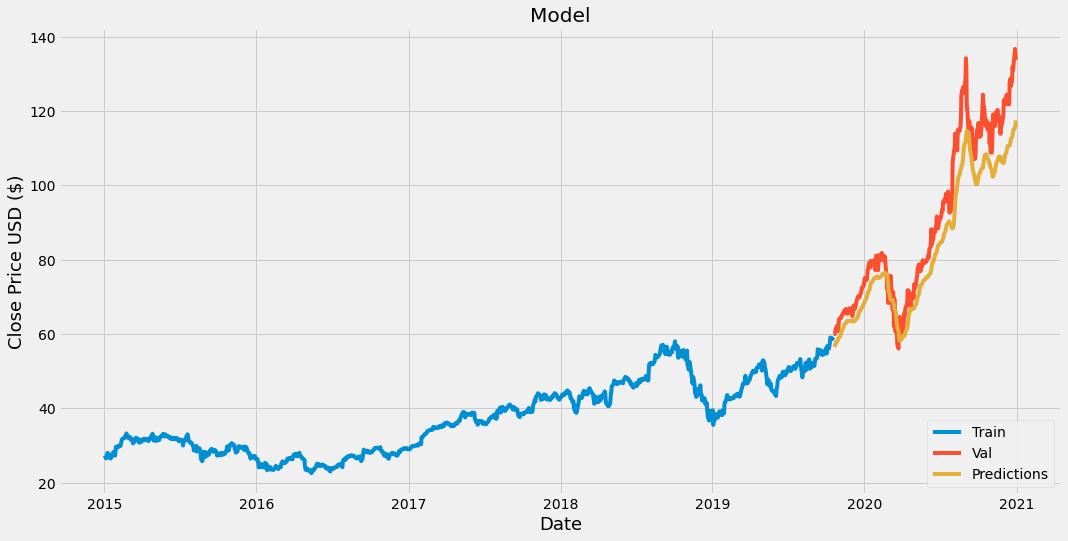

In [70]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [71]:
#Show the actual price and predicted price
valid

,Close,Predictions
Date,,
2019-10-21,60.127499,56.504959
2019-10-22,59.990002,56.792137
2019-10-23,60.794998,57.066696
2019-10-24,60.895000,57.380585
2019-10-25,61.645000,57.694820
...,...,...
2020-12-23,130.960007,114.170921
2020-12-24,131.970001,114.856750
2020-12-28,136.690002,115.537186


In [72]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-12-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[118.06925]]


In [73]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-31', end='2020-12-31')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600,132.49202
